<a href="https://colab.research.google.com/github/kamm8899/CatVSDog/blob/main/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install patool

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patoolib

In [8]:
patoolib.extract_archive('/content/drive/MyDrive/test3.zip')
patoolib.extract_archive('/content/drive/MyDrive/train5.zip')

INFO patool: Extracting /content/drive/MyDrive/test3.zip ...
INFO:patool:Extracting /content/drive/MyDrive/test3.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_bgclglk_ -- /content/drive/MyDrive/test3.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_bgclglk_ -- /content/drive/MyDrive/test3.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/test3.zip extracted to `test3' (local file exists).
INFO:patool:... /content/drive/MyDrive/test3.zip extracted to `test3' (local file exists).
INFO patool: Extracting /content/drive/MyDrive/train5.zip ...
INFO:patool:Extracting /content/drive/MyDrive/train5.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_bp2o9ati -- /content/drive/MyDrive/train5.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_bp2o9ati -- /content/drive/MyDrive/train5.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/train5.zip extracted to `train51' (multiple fil

'train51'

In [9]:
img_size = (100, 100)
batch_size = 64

In [10]:
# Creating ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Creating training and testing sets
training_set =tf.keras.utils.image_dataset_from_directory('/content/train51/train',
                                                 image_size = img_size,
                                                 batch_size = batch_size,
                                                 label_mode = 'binary',
                                                class_names = ['cat', 'dog'])

test_set = tf.keras.utils.image_dataset_from_directory('/content/test3/test1',
                                            image_size = img_size,
                                            batch_size = batch_size,
                                            label_mode = None)


Found 25000 files belonging to 2 classes.
Found 12500 files belonging to 1 classes.


In [ ]:
from os import listdir
from PIL import Image

for filename in listdir('/content/train2'):
  if filename.endswith('.png'):
    try:
      img = Image.open('/content/train2'+filename) # open the image file
      img.verify() # verify that it is, in fact an image
    except (IOError) as e:
      print('Bad file:', filename)

In [13]:
# Defining the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model =model.fit(training_set,epochs=10)

Epoch 1/10
391/391 [==============================] - 695s 2s/step - loss: 3.6929 - accuracy: 0.5880
Epoch 2/10
391/391 [==============================] - 695s 2s/step - loss: 0.6131 - accuracy: 0.6586
Epoch 3/10
391/391 [==============================] - 700s 2s/step - loss: 0.5568 - accuracy: 0.7129
Epoch 4/10
391/391 [==============================] - 686s 2s/step - loss: 0.4627 - accuracy: 0.7781
Epoch 5/10
391/391 [==============================] - 693s 2s/step - loss: 0.3582 - accuracy: 0.8381
Epoch 6/10
391/391 [==============================] - 698s 2s/step - loss: 0.2668 - accuracy: 0.8877
Epoch 7/10
391/391 [==============================] - 688s 2s/step - loss: 0.2457 - accuracy: 0.8990
Epoch 8/10
391/391 [==============================] - 688s 2s/step - loss: 0.1585 - accuracy: 0.9377
Epoch 9/10
391/391 [==============================] - 694s 2s/step - loss: 0.1413 - accuracy: 0.9472
Epoch 10/10
391/391 [==============================] - 686s 2s/step - loss: 0.1106 - accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


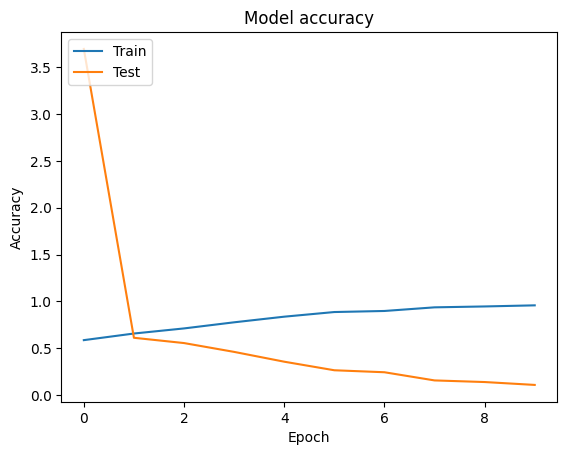

In [14]:
#Plotting Accuracy

plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
#predict
#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predictions = model.predict(training_set) #what is my xtest
predictions = list(predictions)
actuals = list(test_set) #what is my ytest

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_catordog.csv', index=False)

391/391 [==============================] - 218s 557ms/step


ValueError: All arrays must be of the same length